In [1]:
import snapatac2 as snap
import numpy as np
snap.__version__

'2.3.1'

In [8]:
fragment_files = ["SRR24542230/peaks.tsv.gz",
                    "SRR24542231/peaks.tsv.gz", 
                    "SRR24542232/peaks.tsv.gz",
                    "SRR24542233/peaks.tsv.gz"]
samples= ["SRR24542230","SRR24542231","SRR24542232","SRR24542233"]
files = [(sample, file) for sample, file in zip(samples, fragment_files)]
files

[('SRR24542230', 'SRR24542230/peaks.tsv.gz'),
 ('SRR24542231', 'SRR24542231/peaks.tsv.gz'),
 ('SRR24542232', 'SRR24542232/peaks.tsv.gz'),
 ('SRR24542233', 'SRR24542233/peaks.tsv.gz')]

In [7]:
%%time
adatas = []
for name, fl in files:
    data = snap.pp.import_data(
        fl,
        genome=snap.genome.mm10,
        min_tsse=4,
        sorted_by_barcode=False,
        min_num_fragments=1000,
        file=name+'/peaks.h5ad'
    )
    print(data)
    adatas.append(data)

AnnData object with n_obs x n_vars = 16216 x 0 backed at 'SRR24542230/peaks.h5ad'
    obs: 'tsse', 'n_fragment', 'frac_dup', 'frac_mito'
    uns: 'reference_sequences'
    obsm: 'insertion'
AnnData object with n_obs x n_vars = 15813 x 0 backed at 'SRR24542231/peaks.h5ad'
    obs: 'tsse', 'n_fragment', 'frac_dup', 'frac_mito'
    uns: 'reference_sequences'
    obsm: 'insertion'
AnnData object with n_obs x n_vars = 17324 x 0 backed at 'SRR24542232/peaks.h5ad'
    obs: 'tsse', 'n_fragment', 'frac_dup', 'frac_mito'
    uns: 'reference_sequences'
    obsm: 'insertion'
AnnData object with n_obs x n_vars = 15543 x 0 backed at 'SRR24542233/peaks.h5ad'
    obs: 'tsse', 'n_fragment', 'frac_dup', 'frac_mito'
    uns: 'reference_sequences'
    obsm: 'insertion'
CPU times: user 2h 1min 14s, sys: 4min 18s, total: 2h 5min 32s
Wall time: 41min 42s


In [2]:
adata_files = ["SRR24542230/peaks.h5ad",
               "SRR24542231/peaks.h5ad", 
               "SRR24542232/peaks.h5ad",
               "SRR24542233/peaks.h5ad"]
adatas = []

for adata_file in adata_files:
    adata = snap.read(adata_file)  # Read without copy
    adatas.append(adata)

adatas

[AnnData object with n_obs x n_vars = 16216 x 526765 backed at 'SRR24542230/peaks.h5ad'
     obs: 'tsse', 'n_fragment', 'frac_dup', 'frac_mito'
     uns: 'reference_sequences'
     obsm: 'insertion',
 AnnData object with n_obs x n_vars = 15813 x 526765 backed at 'SRR24542231/peaks.h5ad'
     obs: 'tsse', 'n_fragment', 'frac_dup', 'frac_mito'
     uns: 'reference_sequences'
     obsm: 'insertion',
 AnnData object with n_obs x n_vars = 17324 x 526765 backed at 'SRR24542232/peaks.h5ad'
     obs: 'tsse', 'n_fragment', 'frac_dup', 'frac_mito'
     uns: 'reference_sequences'
     obsm: 'insertion',
 AnnData object with n_obs x n_vars = 15543 x 526765 backed at 'SRR24542233/peaks.h5ad'
     obs: 'tsse', 'n_fragment', 'frac_dup', 'frac_mito'
     uns: 'reference_sequences'
     obsm: 'insertion']

In [5]:
for adata in adatas:
    # snap.pp.add_tile_matrix(adata, bin_size=5000)
    # snap.pl.tsse(adata, interactive=False, out_file=f'figures/')
    snap.pp.select_features(adata, n_features=50000)
    snap.pp.scrublet(adata)
    snap.pp.filter_doublets(adata)

2024-11-07 14:43:23 - INFO - Selected 50000 features.
2024-11-07 14:45:15 - INFO - Detected doublet rate = 48.039%
2024-11-07 14:46:43 - INFO - Selected 50000 features.
2024-11-07 14:48:37 - INFO - Detected doublet rate = 32.081%
2024-11-07 14:49:57 - INFO - Selected 50000 features.
2024-11-07 14:52:01 - INFO - Detected doublet rate = 26.356%
2024-11-07 14:53:36 - INFO - Selected 50000 features.
2024-11-07 14:55:28 - INFO - Detected doublet rate = 20.112%


In [6]:
# %%time
# snap.pp.add_tile_matrix(adatas, bin_size=5000)
# # snap.pp.select_features(adatas, n_features=50000)
# # snap.pp.scrublet(adatas)
# # snap.pp.filter_doublets(adatas)
adatas

[AnnData object with n_obs x n_vars = 8426 x 526765 backed at 'SRR24542230/peaks.h5ad'
     obs: 'tsse', 'n_fragment', 'frac_dup', 'frac_mito', 'doublet_probability', 'doublet_score'
     var: 'count', 'selected'
     uns: 'scrublet_sim_doublet_score', 'reference_sequences'
     obsm: 'insertion',
 AnnData object with n_obs x n_vars = 10740 x 526765 backed at 'SRR24542231/peaks.h5ad'
     obs: 'tsse', 'n_fragment', 'frac_dup', 'frac_mito', 'doublet_probability', 'doublet_score'
     var: 'count', 'selected'
     uns: 'reference_sequences', 'scrublet_sim_doublet_score'
     obsm: 'insertion',
 AnnData object with n_obs x n_vars = 12758 x 526765 backed at 'SRR24542232/peaks.h5ad'
     obs: 'tsse', 'n_fragment', 'frac_dup', 'frac_mito', 'doublet_probability', 'doublet_score'
     var: 'count', 'selected'
     uns: 'reference_sequences', 'scrublet_sim_doublet_score'
     obsm: 'insertion',
 AnnData object with n_obs x n_vars = 12417 x 526765 backed at 'SRR24542233/peaks.h5ad'
     obs: 'ts

In [9]:
%%time
data = snap.AnnDataSet(
    adatas=[(name, adata) for (name, _), adata in zip(files, adatas)],
    filename="mkidney.h5ads"
)
data

CPU times: user 346 ms, sys: 31.1 ms, total: 377 ms
Wall time: 917 ms


AnnDataSet object with n_obs x n_vars = 44341 x 526765 backed at 'mkidney.h5ads'
contains 4 AnnData objects with keys: 'SRR24542230', 'SRR24542231', 'SRR24542232', 'SRR24542233'
    obs: 'sample'
    uns: 'AnnDataSet', 'reference_sequences'

In [28]:
data.obs_names 

['SRR24542230_AAACAACGAGATTAAG',
 'SRR24542230_AAACAACGATCGGGCT',
 'SRR24542230_AAACAACGATGATCAC',
 'SRR24542230_AAACAACGATGGCTTA',
 'SRR24542230_AAACACGCTGAACGTG',
 'SRR24542230_AAACACGCTTACCAAC',
 'SRR24542230_AAACACGCTTCAGGTT',
 'SRR24542230_AAACATGGATCGACAT',
 'SRR24542230_AAACCCAGAATTCTGG',
 'SRR24542230_AAACCCAGATCTTTGT',
 'SRR24542230_AAACCCCGAATTCTGG',
 'SRR24542230_AAACCCCGAATTTTGG',
 'SRR24542230_AAACCCCGATCTTTGT',
 'SRR24542230_AAACCCGGAATTCTGG',
 'SRR24542230_AAACCCGGATCTTTGT',
 'SRR24542230_AAACCCTGAATTCTGG',
 'SRR24542230_AAACCCTGAATTTTGG',
 'SRR24542230_AAACCCTGAGCGGATC',
 'SRR24542230_AAACCCTGAGCGGGTC',
 'SRR24542230_AAACCCTGAGCGGTTC',
 'SRR24542230_AAACCGAACTGTTGTG',
 'SRR24542230_AAACCGCACTGTTGTG',
 'SRR24542230_AAACCGGACTCTTTGT',
 'SRR24542230_AAACCGGACTGTTGTG',
 'SRR24542230_AAACCGTACAACGAAT',
 'SRR24542230_AAACCGTACAATCTGC',
 'SRR24542230_AAACCGTACATCGGTT',
 'SRR24542230_AAACCGTACCGACAAG',
 'SRR24542230_AAACCGTACGTTCTCC',
 'SRR24542230_AAACCGTACTCTTTGT',
 'SRR24542

In [27]:

sample_names = data.obs['sample'].to_list()

data.obs_names = [f"{sample}_{obs_name}" for sample, obs_name in zip(sample_names, data.obs_names)]

In [29]:
snap.pp.select_features(data, n_features=50000)

2024-11-07 15:20:07 - INFO - Selected 50000 features.


In [30]:
%%time
snap.tl.spectral(data)

CPU times: user 1min 54s, sys: 4min 58s, total: 6min 53s
Wall time: 1min 12s


In [31]:
%%time
snap.tl.umap(data)

/usr/local/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning:

The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.

/usr/local/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning:

The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.

/usr/local/lib/python3.10/site-packages/umap/distances.py:1086: NumbaDeprecationWarning:

The 'nopython' keyword argument was not supplied to th

CPU times: user 1min 35s, sys: 56.7 s, total: 2min 31s
Wall time: 47.9 s


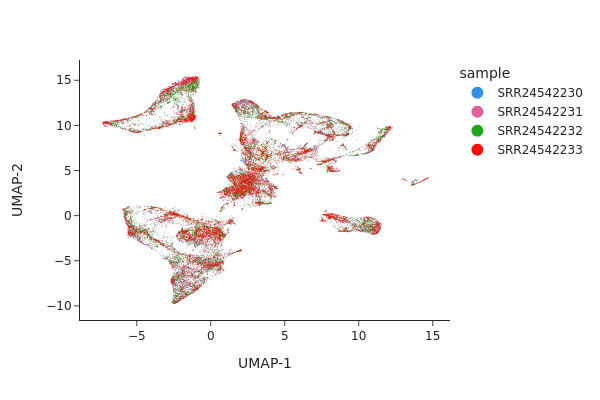

In [32]:
snap.pl.umap(data, color="sample", interactive=False, out_file="figures/snap_umap.png")

### Batch correlation

In [33]:
%%time
snap.pp.mnc_correct(data, batch="sample")
snap.pp.harmony(data, batch="sample", max_iter_harmony=20)

2024-11-07 15:23:54,487 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-11-07 15:23:54 - INFO - Computing initial centroids with sklearn.KMeans...
2024-11-07 15:23:59,674 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-11-07 15:23:59 - INFO - sklearn.KMeans initialization complete.
2024-11-07 15:23:59,836 - harmonypy - INFO - Iteration 1 of 20
2024-11-07 15:23:59 - INFO - Iteration 1 of 20
2024-11-07 15:24:14,361 - harmonypy - INFO - Iteration 2 of 20
2024-11-07 15:24:14 - INFO - Iteration 2 of 20
2024-11-07 15:24:28,929 - harmonypy - INFO - Iteration 3 of 20
2024-11-07 15:24:28 - INFO - Iteration 3 of 20
2024-11-07 15:24:33,331 - harmonypy - INFO - Iteration 4 of 20
2024-11-07 15:24:33 - INFO - Iteration 4 of 20
2024-11-07 15:24:37,863 - harmonypy - INFO - Converged after 4 iterations
2024-11-07 15:24:37 - INFO - Converged after 4 iterations


CPU times: user 12min 43s, sys: 20min 44s, total: 33min 27s
Wall time: 1min 16s


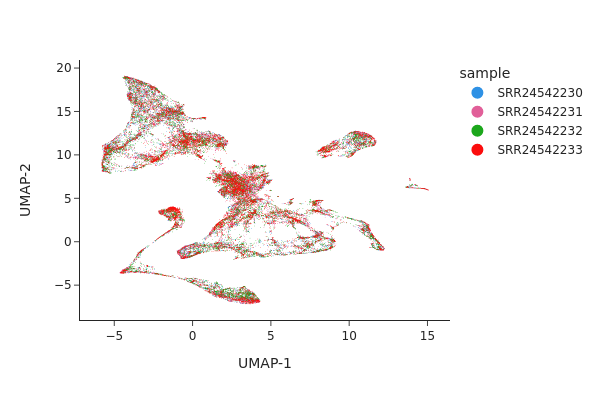

In [35]:
snap.tl.umap(data, use_rep="X_spectral_mnn")
snap.pl.umap(data, color="sample", interactive=False, out_file="figures/snap_batch_mnn.png")

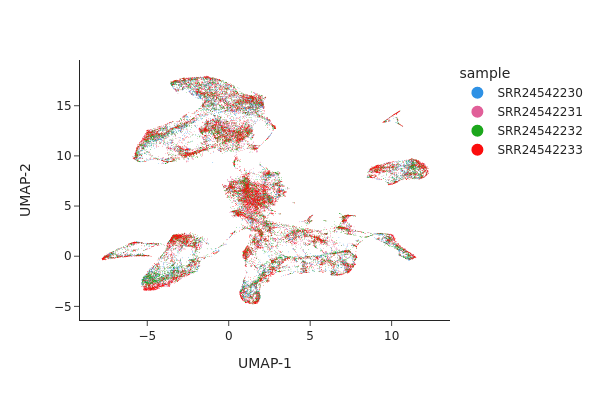

In [36]:
snap.tl.umap(data, use_rep="X_spectral_harmony")
snap.pl.umap(data, color="sample", interactive=False, out_file="figures/snap_batch_harm.png")

### Clustering

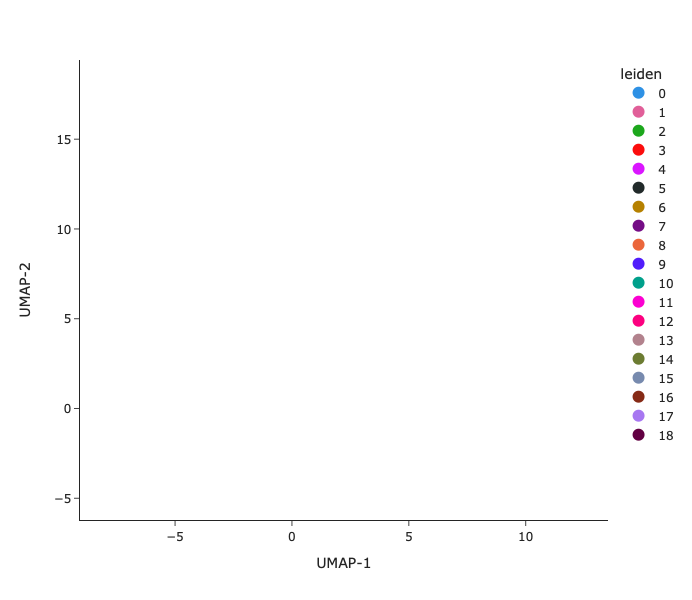

In [45]:
# snap.pp.knn(data, use_rep="X_spectral_harmony")
# snap.tl.leiden(data)
snap.pl.umap(data, color="leiden", interactive=True, width=600, height=600, out_file="figures/snap_cluster.png")

In [46]:
data.close()

In [43]:
data = snap.read_dataset("mkidney.h5ads")
data

AnnDataSet object with n_obs x n_vars = 44341 x 526765 backed at 'mkidney.h5ads'
contains 4 AnnData objects with keys: 'SRR24542230', 'SRR24542231', 'SRR24542232', 'SRR24542233'
    obs: 'sample', 'leiden'
    var: 'count', 'selected'
    uns: 'reference_sequences', 'AnnDataSet', 'spectral_eigenvalue'
    obsm: 'X_umap', 'X_spectral_harmony', 'X_spectral', 'X_spectral_mnn'
    obsp: 'distances'

In [ ]:
import scanpy